Dataset shape: (5572, 2)

First few rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Message length statistics:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


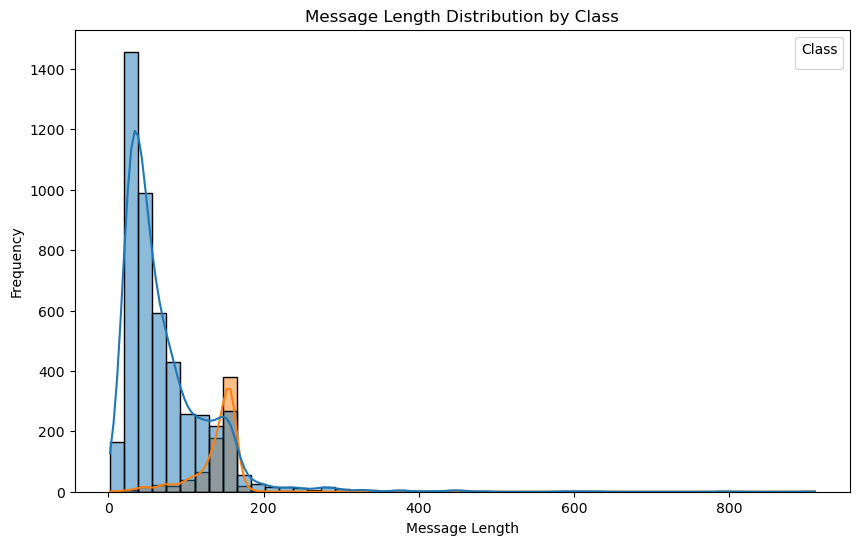


Step 2: Preprocessing the data
Training set size: 4457
Testing set size: 1115

Step 3: Feature Engineering
Creating TF-IDF vectorizer

Step 4: Building ML models

Step 5: Training and evaluating models

Training Naive Bayes...
Naive Bayes Accuracy: 0.9740
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



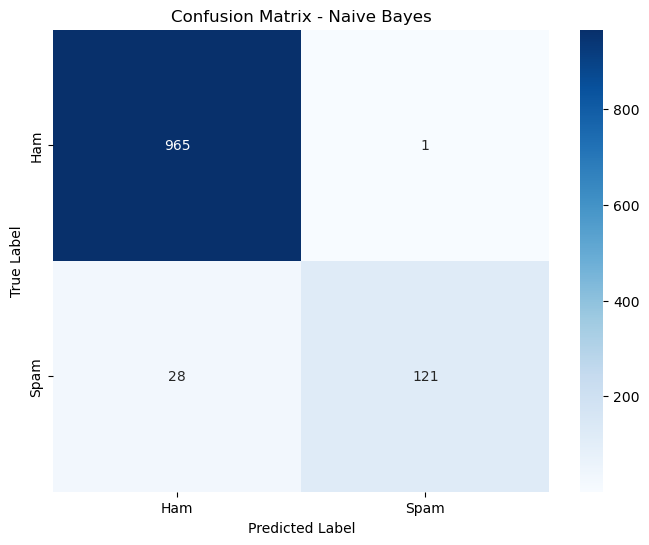


Training Logistic Regression...
Logistic Regression Accuracy: 0.9731
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



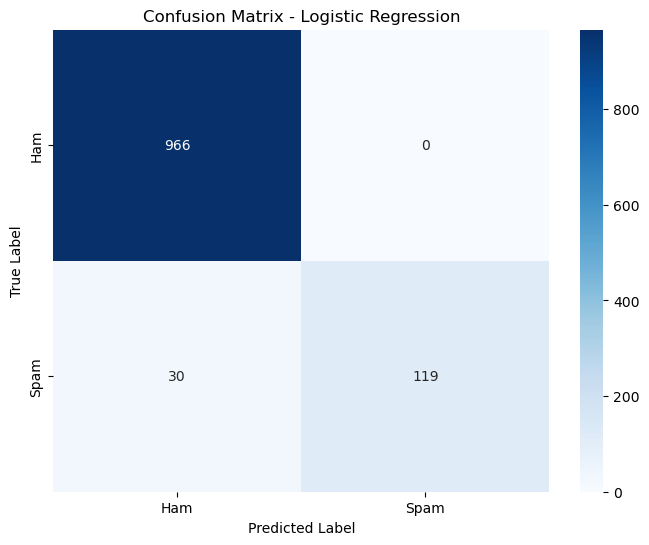


Training Random Forest...
Random Forest Accuracy: 0.9767
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



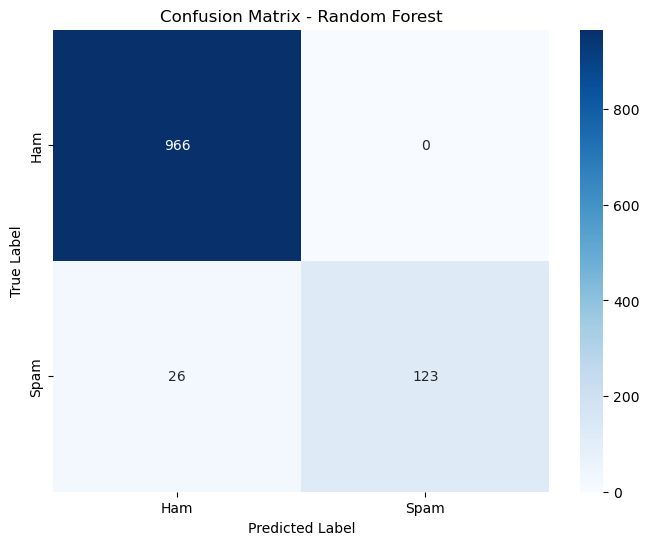


Step 6: Hyperparameter tuning
Best model: Random Forest with accuracy 0.9767
Starting grid search (this may take some time)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 1}
Best cross-validation accuracy: 0.9816
Tuned model accuracy: 0.9776
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



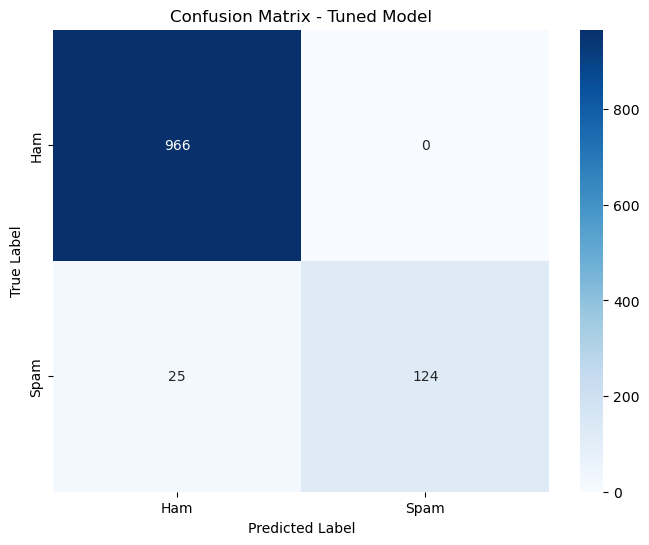


Step 7: Feature importance analysis

Step 8: Testing with new messages
Predictions for sample messages:
Message: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Prediction: Spam (Probability of spam: 1.0000)

Message: Hey, how are you doing? Want to meet up for lunch tomorrow?
Prediction: Ham (Probability of spam: 0.0000)

Message: WINNER!! As a valued network customer you have been selected to receive a £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Prediction: Spam (Probability of spam: 0.9701)

Message: I'll be home late tonight, please don't wait up for me.
Prediction: Ham (Probability of spam: 0.0000)


Step 9: Saving the model
Model saved to spam_detection_model.pkl

Step 10: Loading and using the saved model

# Example code to load and use the saved model
import pickle

# Load the model
with open('spam_detection_model.pkl', 'rb') as file:

In [3]:
# Spam Email Detection using Scikit-learn
# Step-by-step implementation and evaluation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and explore the dataset
# For this example, we'll use the SMS Spam Collection dataset
# Download it from: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
# or use the direct URL

# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]

# Explore the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Check class distribution
print("\nClass distribution:")
print(df['label'].value_counts())

# Basic statistics
print("\nMessage length statistics:")
df['length'] = df['message'].apply(len)
print(df.groupby('label')['length'].describe())

# Visualize message length by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()

# Step 2: Preprocess the data
print("\nStep 2: Preprocessing the data")
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Step 3: Feature Engineering - Convert text to numerical features
print("\nStep 3: Feature Engineering")
print("Creating TF-IDF vectorizer")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.8,
    stop_words='english'
)

# Step 4: Build various ML models
print("\nStep 4: Building ML models")
# Create a pipeline for each model
models = {
    'Naive Bayes': Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', MultinomialNB())
    ]),
    'Logistic Regression': Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
}

# Step 5: Train and evaluate models
print("\nStep 5: Training and evaluating models")
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Step 6: Hyperparameter tuning for the best model
print("\nStep 6: Hyperparameter tuning")
# Select the best model (usually Logistic Regression or Naive Bayes for this task)
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"Best model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

# Let's tune the best model
if best_model_name == "Naive Bayes":
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000, 7000],
        'tfidf__min_df': [1, 2],
        'tfidf__max_df': [0.7, 0.8, 0.9],
        'classifier__alpha': [0.1, 0.5, 1.0]
    }
elif best_model_name == "Logistic Regression":
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000, 7000],
        'tfidf__min_df': [1, 2],
        'tfidf__max_df': [0.7, 0.8, 0.9],
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    }
else:  # Random Forest
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000],
        'tfidf__min_df': [1, 2],
        'tfidf__max_df': [0.7, 0.8],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    }

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("Starting grid search (this may take some time)...")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Tuned model accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Plot confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 7: Feature importance analysis
print("\nStep 7: Feature importance analysis")
if best_model_name in ["Logistic Regression", "Naive Bayes"]:
    # Get feature names
    feature_names = best_model.named_steps['tfidf'].get_feature_names_out()
    
    if best_model_name == "Logistic Regression":
        # Get coefficients
        coefficients = best_model.named_steps['classifier'].coef_[0]
        
        # Create DataFrame for feature importance
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients
        })
        
        # Sort by absolute importance
        feature_importance['Abs_Importance'] = abs(feature_importance['Importance'])
        feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False)
        
        # Plot top 20 features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(20)
        sns.barplot(x='Importance', y='Feature', data=top_features)
        plt.title('Top 20 Features by Importance (Logistic Regression)')
        plt.show()
    else:  # Naive Bayes
        # Get feature probabilities
        feature_probs = best_model.named_steps['classifier'].feature_log_prob_
        spam_probs = feature_probs[1]
        ham_probs = feature_probs[0]
        
        # Calculate log ratio (log(P(feature|spam) / P(feature|ham)))
        log_ratio = spam_probs - ham_probs
        
        # Create DataFrame for feature importance
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Log_Ratio': log_ratio
        })
        
        # Sort by absolute importance
        feature_importance['Abs_Log_Ratio'] = abs(feature_importance['Log_Ratio'])
        feature_importance = feature_importance.sort_values('Abs_Log_Ratio', ascending=False)
        
        # Plot top 20 features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(20)
        sns.barplot(x='Log_Ratio', y='Feature', data=top_features)
        plt.title('Top 20 Features by Importance (Naive Bayes)')
        plt.show()

# Step 8: Test with new messages
print("\nStep 8: Testing with new messages")
def predict_spam(message, model):
    """Predict if a message is spam or ham."""
    prediction = model.predict([message])[0]
    probability = model.predict_proba([message])[0][1]
    return "Spam" if prediction == 1 else "Ham", probability

# Test with sample messages
test_messages = [
    "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
    "Hey, how are you doing? Want to meet up for lunch tomorrow?",
    "WINNER!! As a valued network customer you have been selected to receive a £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.",
    "I'll be home late tonight, please don't wait up for me."
]

print("Predictions for sample messages:")
for message in test_messages:
    prediction, probability = predict_spam(message, best_model)
    print(f"Message: {message}")
    print(f"Prediction: {prediction} (Probability of spam: {probability:.4f})")
    print()

# Step 9: Save the model
print("\nStep 9: Saving the model")
import pickle

# Save the best model
model_filename = "spam_detection_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")

# Step 10: How to load and use the model
print("\nStep 10: Loading and using the saved model")
print("""
# Example code to load and use the saved model
import pickle

# Load the model
with open('spam_detection_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to classify new messages
def classify_message(message):
    prediction = loaded_model.predict([message])[0]
    probability = loaded_model.predict_proba([message])[0][1]
    return "Spam" if prediction == 1 else "Ham", probability

# Example usage
message = "Your input message here"
classification, prob = classify_message(message)
print(f"The message is classified as: {classification}")
print(f"Probability of being spam: {prob:.4f}")
""")

print("\nConclusion:")
print(f"The best model achieved an accuracy of {accuracy:.4f} on the test set.")
print("This notebook demonstrates the complete machine learning pipeline for spam detection:")
print("1. Data loading and exploration")
print("2. Data preprocessing")
print("3. Feature engineering")
print("4. Model training and evaluation")
print("5. Hyperparameter tuning")
print("6. Feature importance analysis")
print("7. Testing with new messages")
print("8. Model saving and loading")